In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

# Celeb ID

In [2]:
df = pd.read_csv('Data/identity_CelebA.txt', sep=' ', header=None)
df = df.rename(columns={0:'image', 1:'ID'})
df.head()

,image,ID
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295


In [3]:
celeb_counts = df.ID.value_counts().to_frame('Count')
celeb_counts

,Count
3227,35
2820,35
3782,35
3745,34
3699,34
...,...
8815,1
9770,1
2264,1
9075,1


In [4]:
celeb_counts.describe()

,Count
count,10177.000000
mean,19.907537
std,8.925916
min,1.000000
25%,13.000000
50%,21.000000
75%,29.000000
max,35.000000


In [5]:
print(f'There are {len(celeb_counts)} celebrities in the dataset.')

There are 10177 celebrities in the dataset.


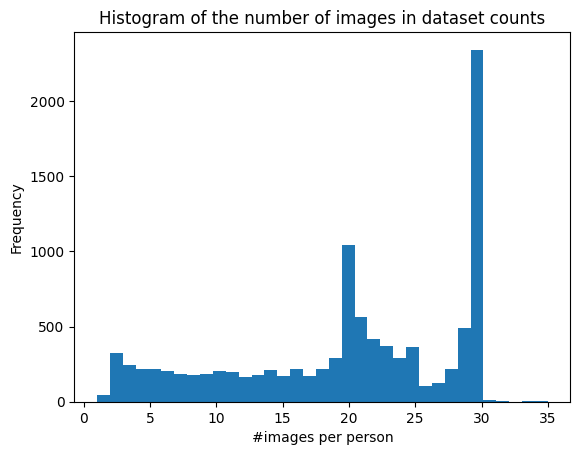

In [6]:
plt.hist(celeb_counts.Count, bins=35)
plt.title('Histogram of the number of images in dataset counts')
plt.xlabel('#images per person')
plt.ylabel('Frequency')
plt.show();

# Celeb Names

Basically the same as above. We are just swapping ID for celebrity names. 

In [7]:
df = pd.read_csv('Data/list_identity_celeba.txt', sep='\s+', header=None)
df = df.rename(columns={0:'image', 1:'name'})
df.head()

,image,name
0,000001.jpg,Elizabeth_Gutierrez
1,000002.jpg,Emilia_Fox
2,000003.jpg,Shane_Harper
3,000004.jpg,Leonor_Varela
4,000005.jpg,Tatana_Kucharova


In [8]:
celeb_counts = df.name.value_counts().to_frame('Count')
celeb_counts

,Count
Fonzworth_Bentley,35
Ekaterina_Vilkova,35
Heidi_Range,35
Havana_Brown,34
Hank_Baskett,34
...,...
Shoji_Tabuchi,1
Vicki_Sato,1
Dannine_Avara,1
Steve_Y_Kim,1


In [9]:
one_count = (celeb_counts.Count == 1).sum()
print(f'There are {one_count} celebrities with one image only.')

There are 44 celebrities with one image only.


# CelebA Images

In [10]:
# original image
img = mpimg.imread('/Users/yuhanyao/Downloads/7z_zip/img_celeba/000001.jpg')
print(img.shape)

(687, 409, 3)


In [11]:
# normalize image
img_norm = img/255.0
# Add noise
mean = 0
sigma = 0.2
gaussian = np.random.normal(mean, sigma, (img_norm.shape[0],img_norm.shape[1]))
noisy_image = img_norm + gaussian.reshape(img_norm.shape[0],img_norm.shape[1], 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


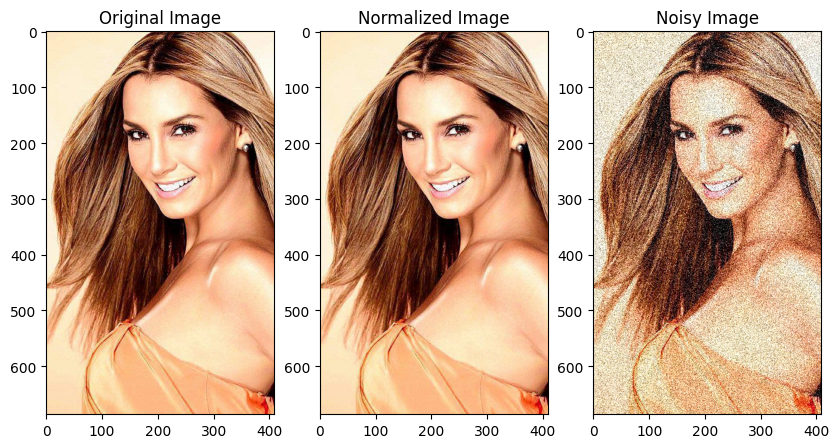

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes.ravel()
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[1].imshow(img_norm)
axes[1].set_title('Normalized Image')
axes[2].imshow(noisy_image)
axes[2].set_title('Noisy Image')
plt.show();

In [13]:
img_shapes = []
img_ids = np.arange(0, 202599)
for i in img_ids:
    file_name = str(i+1)
    file_name = '0'*(6-len(file_name))+file_name+'.jpg'
    img = mpimg.imread('/Users/yuhanyao/Downloads/7z_zip/img_celeba/'+file_name)
    img_shapes.append(img.shape)
img_shapes = np.array(img_shapes)
img_shapes.shape

(202599, 3)

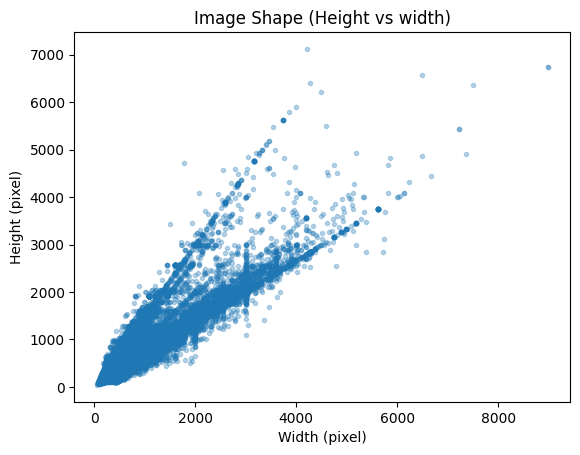

In [14]:
img_shapes = np.array(img_shapes)
plt.scatter(img_shapes[:, 0], img_shapes[:, 1], marker='.', alpha=0.3)
plt.ylabel('Height (pixel)')
plt.xlabel('Width (pixel)')
plt.title('Image Shape (Height vs width)')
plt.show();